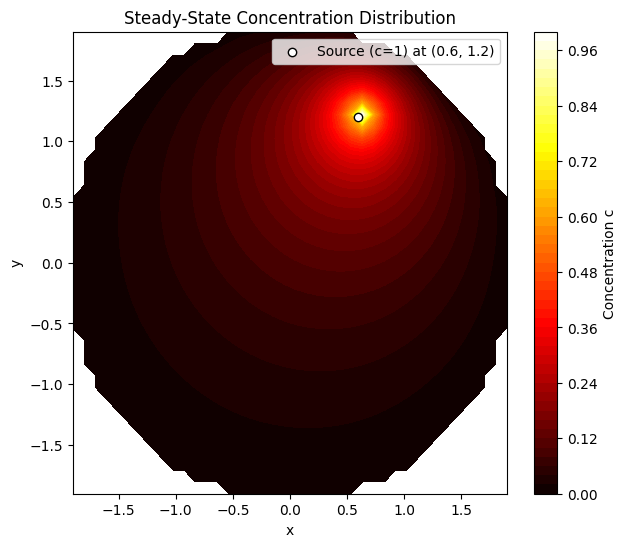

In [ ]:
import numpy as np
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from src.funcs_3_2 import M_matrix_disk  

# domain and grid parameters
radius = 2  
N = 40  
L = 2 * radius  

# M matrix for disk domain
M, X, Y, mask, b = M_matrix_disk(N, L)

c_solution = scipy.sparse.linalg.spsolve(M, b)
c_solution_2D = c_solution.reshape(N, N)
c_solution_2D[mask] = np.nan  # points outside disk domain --> NaN 

plt.figure(figsize=(7, 6))
cmap = plt.cm.hot.copy()
cmap.set_bad("white")  # masked values --> white
plt.contourf(X, Y, c_solution_2D, levels=50, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label("Concentration c")

# Show source point
plt.scatter([0.6], [1.2], color='white', edgecolor='black', marker='o', label="Source (c=1) at (0.6, 1.2)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Steady-State Concentration Solution Disk", fontweight='semibold')
plt.show()
